# FIFA19 축구선수 데이터

### KQ
"왼손잡이가 공부를 잘한다는 속설처럼 왼발잡이는 축구를 잘할까?"

- 문제 정의: 왼발잡이 선수가 오른발잡이 선수보다 축그를 잘하는지 확인해보고 싶다.
- 검증 방식: 구단 가치 상위 10개 팀에서 왼발잡이와 오른발잡이 급여의 차이 확인.

#### 활용 데이터

 칼럼명 | 의미 | 예시
- | - | -
Name | 이름 | L.Messi
Age | 나이 | 31
Nationality | 국적 | Argentina
Overall | 현재 선수의 종합 능력치 | 94
Potential | 선수의 잠재적 능력치 | 94
Club | 소속 구단 | FC Barcelona
Value | 선수 가치 (단위 : €유로) | 110000000
Wage | 급여 (단위 : €유로) | 565000
Preferred Foot | 선호하는 발 | Left
Position | 포지션 | RF

*출처 : https://www.kaggle.com/karangadiya/fifa19*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import sys
import platform
import warnings

warnings.filterwarnings(action='ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#### FIFA 데이터 확인

In [2]:
# fifa_data 열기
fifa_data = pd.read_csv('./data/fifa_data.csv')

In [3]:
# fifa19 데이터구조 확인
fifa_data.shape
fifa_data.info()
fifa_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            18207 non-null  object 
 1   Age             18207 non-null  int64  
 2   Nationality     18207 non-null  object 
 3   Overall         18207 non-null  int64  
 4   Potential       18207 non-null  int64  
 5   Club            17966 non-null  object 
 6   Value           18207 non-null  int64  
 7   Wage            18207 non-null  int64  
 8   Preferred Foot  18159 non-null  object 
 9   Position        18147 non-null  object 
 10  Height          18159 non-null  float64
 11  Weight          18159 non-null  float64
dtypes: float64(2), int64(5), object(5)
memory usage: 1.7+ MB


,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,Position,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,110000000,565000,Left,RF,5.70,159.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000,405000,Right,ST,6.20,183.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118000000,290000,Right,LW,5.90,150.0
3,De Gea,27,Spain,91,93,Manchester United,72000000,260000,Right,GK,6.40,168.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000,355000,Right,RCM,5.11,154.0


In [4]:
# 활용하고자 하는 컬럼 선별
fifa_data_select = fifa_data[['Club','Preferred Foot','Wage','Value']]
fifa_data_select.head(3)

,Club,Preferred Foot,Wage,Value
0,FC Barcelona,Left,565000,110000000
1,Juventus,Right,405000,77000000
2,Paris Saint-Germain,Right,290000,118000000


In [5]:
# '구단가치 = 구단 내 선수들의 가치 합' 이라 가정
groupby_club = fifa_data_select.groupby("Club")[['Value']].sum()
# 구단가치 기준 내림차순 정렬 후 Top10구단 선별
groupby_club = groupby_club.sort_values('Value', ascending = False)
groupby_club = groupby_club.head(10)
groupby_club

,Value
Club,
Real Madrid,867425000
FC Barcelona,844800000
Manchester City,779855000
Juventus,698575000
FC Bayern München,675225000
Atlético Madrid,638925000
Paris Saint-Germain,618325000
Tottenham Hotspur,610750000
Chelsea,601015000


In [6]:
# Top10구단 이름
list(groupby_club.index)

['Real Madrid',
 'FC Barcelona',
 'Manchester City',
 'Juventus',
 'FC Bayern München',
 'Atlético Madrid',
 'Paris Saint-Germain',
 'Tottenham Hotspur',
 'Chelsea',
 'Manchester United']

In [7]:
# Top10 구단의 선수정보 추출
is_top10_club = fifa_data_select['Club'].isin(groupby_club.index)
fifa_data_top10_club = fifa_data_select[is_top10_club]

In [8]:
df = fifa_data_top10_club.groupby('Preferred Foot').mean()['Wage'].reset_index()
df

,Preferred Foot,Wage
0,Left,108717.647059
1,Right,99517.391304


In [9]:
# plt에서 한글 폰트설정
# 플랫폼 확인
print(platform.system()) 
# 윈도우
if platform.system() == 'Windows':
   rc('font', family='NanumBarunGothic')
# 맥
elif platform.system() == 'Darwin': 
   rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
   rc('font', family='NanumBarunGothic')

Darwin


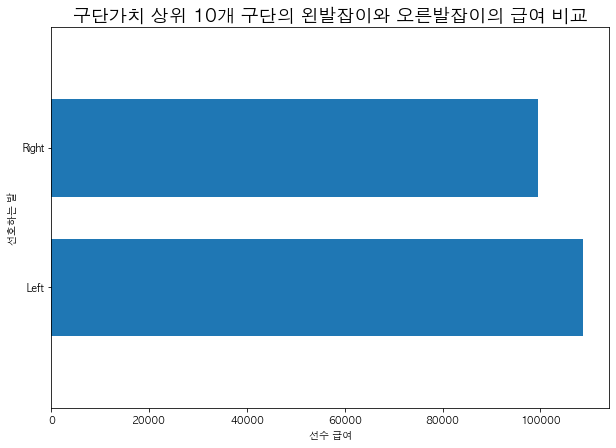

In [10]:
# 상위 10개 구단 내 왼발잡이 선수와 오른발 잡이 선수의 평균급여 시각화

fig, axes = plt.subplots(figsize = (10, 7))
axes.barh(df['Preferred Foot'],df['Wage'], height = 0.7)
axes.set_title('구단가치 상위 10개 구단의 왼발잡이와 오른발잡이의 급여 비교', size=18)
axes.set_xlabel('선수 급여', size=10)
axes.set_ylabel('선호하는 발', size=10)
plt.margins(y=0.3)

## 데이터 분석 결과를 통해 도출한 결론

#### 데이터 분석 결과
 1. 왼발잡이의 평균 급여는 108717.65(유로) (소수점 3번째 자리에서 반올림)
 2. 오른발잡이의 평균 급여는 99517.39(유로) (소수점 3번째 자리에서 반올림)
 3. 왼발잡이 선수가 오른발잡이 선수에 비해 급여가 소폭 높음을 확인

#### 결론

1. 분석 결과 왼발잡이 선수가 오른발잡이 선수에 비해 급여가 소폭 높은 것을 확인했으나 위 결과만을 보고 왼발잡이 선수가 축구를 더 잘한다고 단정 짓는다면 위험할 것 같다.

2. 축구선수에 대한 기본 지식이 부족한 상황에서 검증 방식을 결정하고 결과를 도출해냈기 때문에 분석에 대한 결론에 신뢰도가 떨어지는 것을 느낀다.

3. 제대로 된 문제 해결을 위해서는 분석하고자 하는 분야에 대한 도메인 지식을 충분히 쌓아 탄탄한 논리를 기반으로 데이터 분석을 진행해야 할 것 같다.

---

## 번외 분석

#### Top10 선수의 구단가치 순위 시각화로 알아보기

In [11]:
fifa_data

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,Position,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,110000000,565000,Left,RF,5.70,159.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000,405000,Right,ST,6.20,183.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118000000,290000,Right,LW,5.90,150.0
3,De Gea,27,Spain,91,93,Manchester United,72000000,260000,Right,GK,6.40,168.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000,355000,Right,RCM,5.11,154.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,47,65,Crewe Alexandra,60000,1000,Right,CM,5.90,134.0
18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60000,1000,Right,ST,6.30,170.0
18204,B. Worman,16,England,47,67,Cambridge United,60000,1000,Right,ST,5.80,148.0
18205,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60000,1000,Right,RW,5.10,154.0


In [12]:
Top10 = fifa_data.sort_values('Value', ascending=False).head(10)
Top10_Name = Top10["Name"].unique()
print(Top10_Name)

['Neymar Jr' 'L. Messi' 'K. De Bruyne' 'E. Hazard' 'P. Dybala' 'H. Kane'
 'K. Mbappé' 'L. Suárez' 'A. Griezmann' 'R. Lewandowski']


In [13]:
groupby_club = fifa_data.groupby('Club').mean()['Value'].sort_values(ascending=False)

구단가치 순위를 알고싶은 선수 이름을 입력하세요.L. Messi


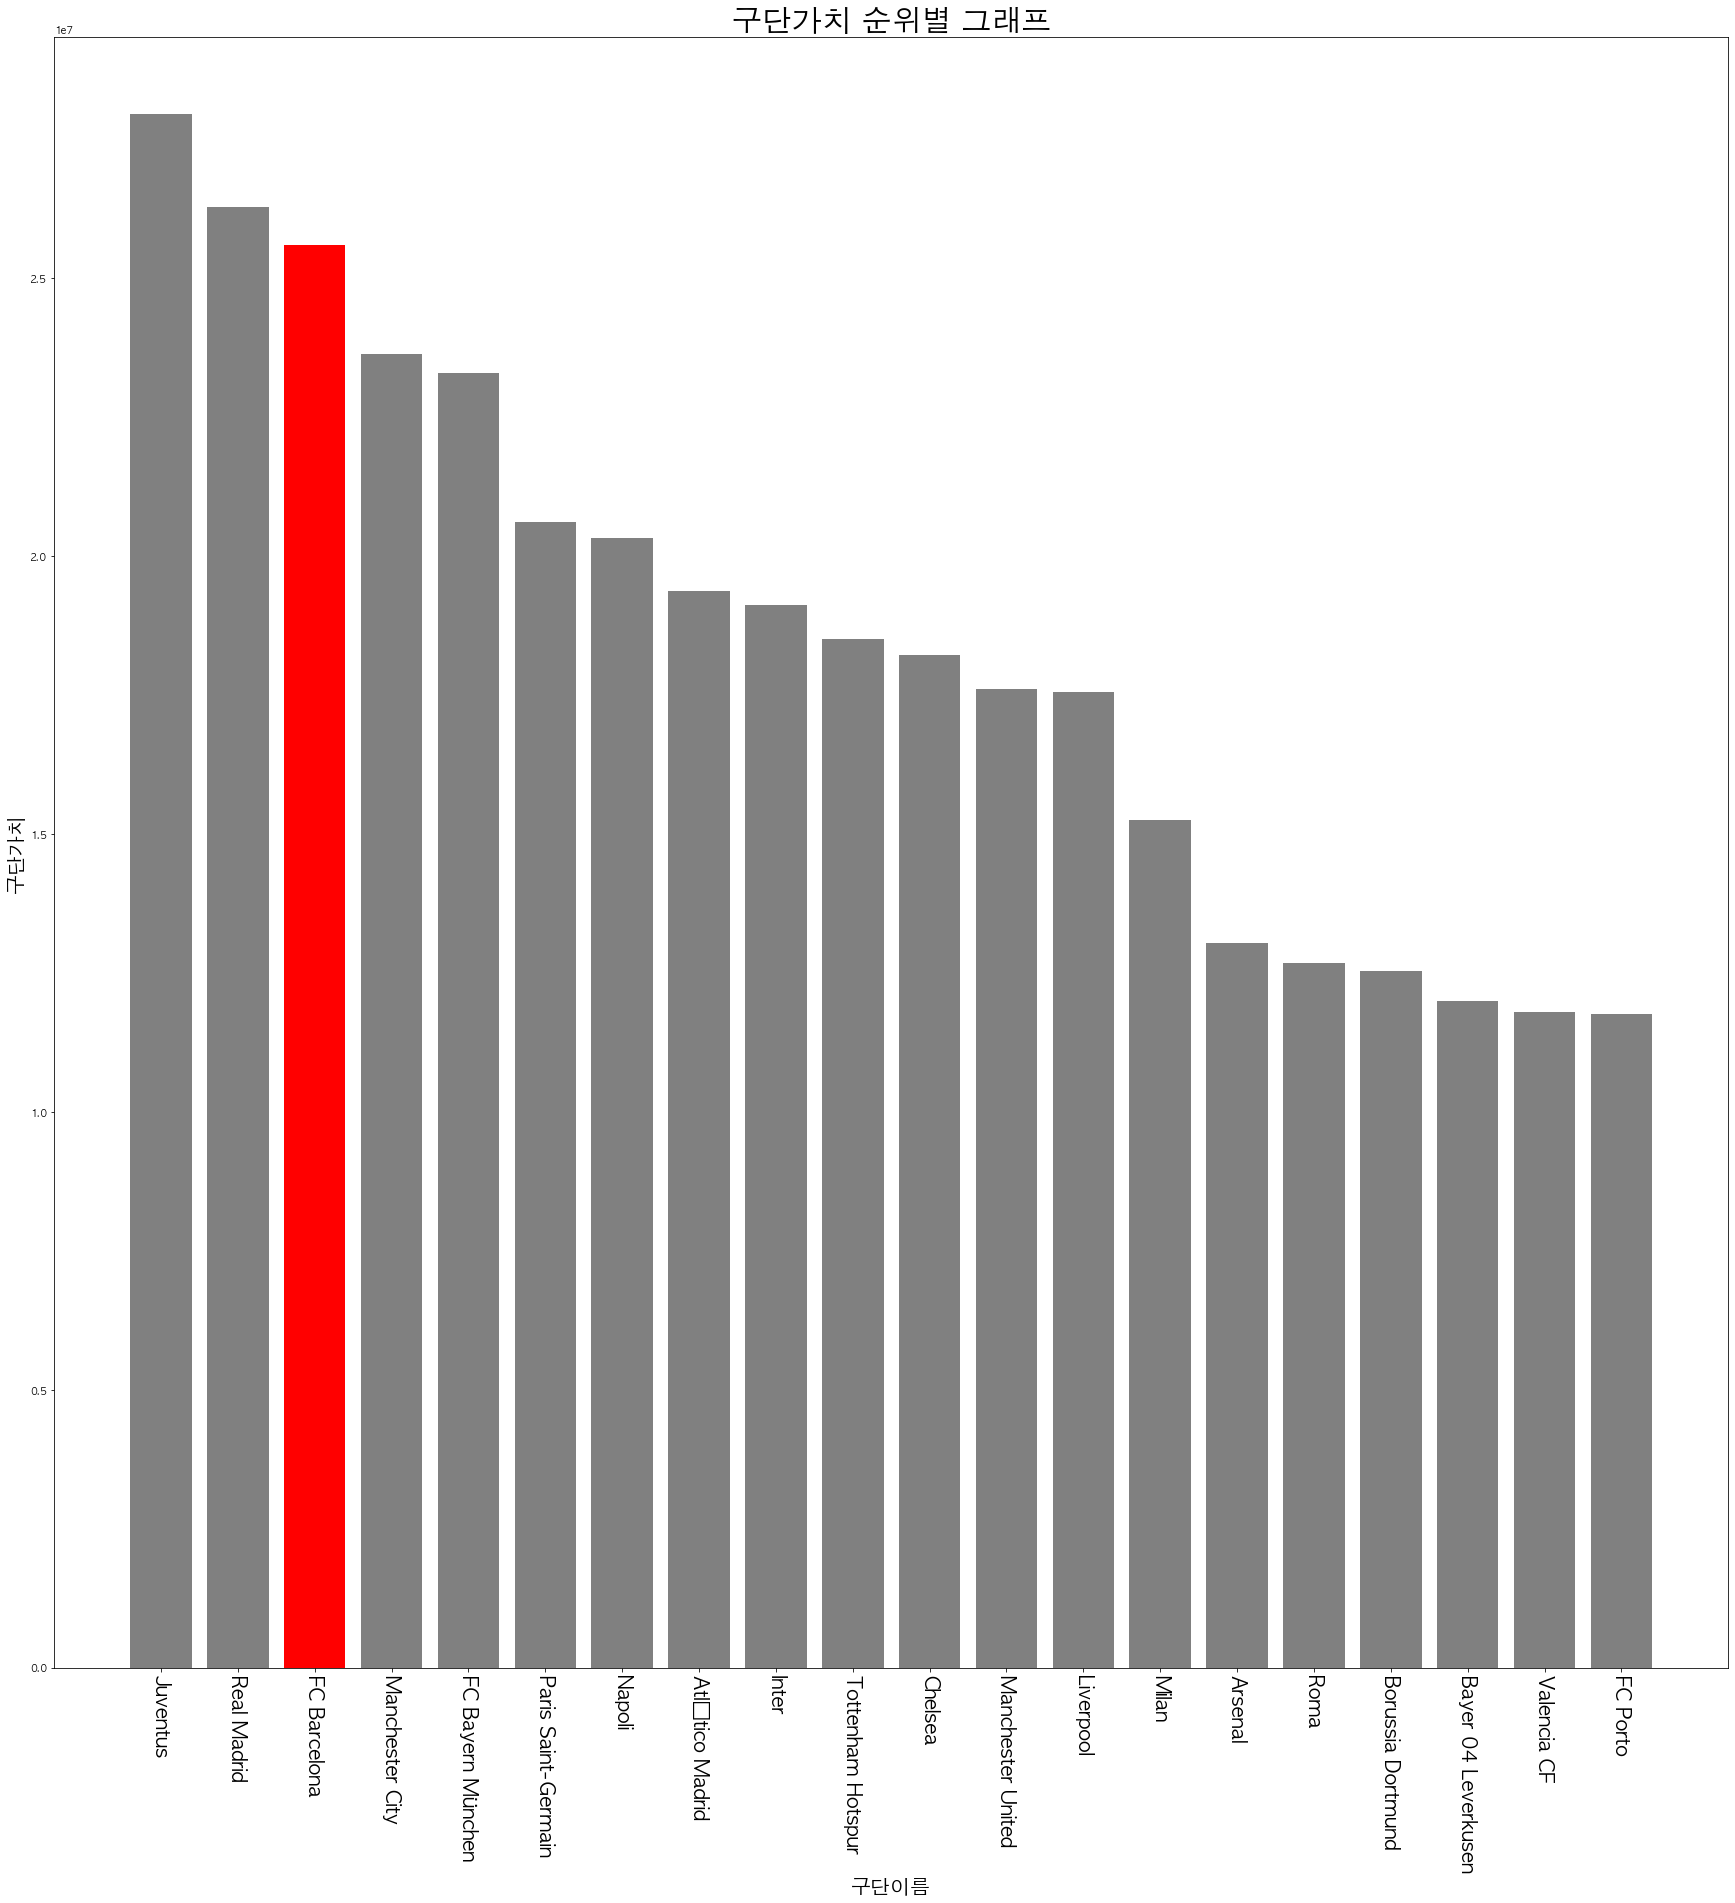

In [14]:
# 구단가치 순위 알고싶은 선수 이름 입력받기
try :
    Name = input("구단가치 순위를 알고싶은 선수 이름을 입력하세요.")
    assert Name in Top10_Name
# Top10내 선수가 아니라면 
except : 
    print("Top10 내의 선수 이름을 입력하세요.")
    raise

# 상위 20개의 구단만 추출
groupby_Club_Top20 = groupby_club[0:20]

# 입력한 선수의 구단 red 색상 설정
colors = []
for club in groupby_Club_Top20.index:
    if Top10[Top10["Name"]==Name]["Club"].values == club:
        colors.append('red')
    else:
        colors.append('gray')
#print(colors) # 색상 확인

# barchart 그리기
fig, axes = plt.subplots(figsize = (30,30))
axes.bar(groupby_Club_Top20.index, groupby_Club_Top20.values, color = colors)

plt.xticks(rotation=270, size=20)
plt.title("구단가치 순위별 그래프", size=30)
plt.xlabel("구단이름", size=20)
plt.ylabel("구단가치", size=20)
plt.show()

----